In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
from os.path import join

In [2]:
abalone_path = join('.','abalone.txt')
column_path = join('.','abalone_attributes.txt')

In [3]:
abalone_path

'./abalone.txt'

In [4]:
column_path

'./abalone_attributes.txt'

In [5]:
abalone_columns = list()
for line in open(column_path): #column_path에 대한 것을 한 줄씩 읽어들이기 위함
  abalone_columns.append(line.strip()) # text외에 불필요한 요소는 strip()으로 제거
abalone_columns

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

In [6]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)

In [7]:
label = data['Sex']
# label에 성별 컬럼을 넣었기에 data 변수에서는 불필요하므로 삭제
del data['Sex']

In [8]:
# 데이터 정보 확인 방법들
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [10]:
# Scaling
 # Min-Max Scaling
# data = (data - np.min(data)/np.max(data)-np.min(data))
# data

In [11]:
# 위의 Min-Max Scaling의 방법이 번거롭기에 만들어진 함수로 간단하게 적용해보자.
from sklearn.preprocessing import MinMaxScaler

mMscaler = MinMaxScaler()
# fit() #옷가게에서 옷 입어보는거와 비슷. 데이터를 한번 입혀봄. fit이라는 표현 많이 씀. overfitting underfitting
mMscaler.fit(data)
# transform() # 입혀본 다음 괜찮으면 변형시키는 것. 두개 같이 와야됨.
mScaled_data = mMscaler.transform(data)
mScaled_data

#위 과정도 번거롭기에 한번에 해주는 과정은 바로
mScaled_data = mMscaler.fit_transform(data)
mScaled_data

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [12]:
mScaled_data = pd.DataFrame(mScaled_data, columns = data.columns)
mScaled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


In [13]:
# 표준 정규화도 만들어진 함수로 쉽게!
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

sdscaled_data = sdscaler.fit_transform(data)

In [14]:
sdscaled_data = pd.DataFrame(sdscaled_data, columns = data.columns)
sdscaled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [15]:
sdscaled_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03
mean,-5.834718e-16,-3.027929e-16,3.912493e-16,9.185853e-17,-1.020650e-17,2.704723e-16,2.976897e-16,8.505419e-17
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-3.739154e+00,-3.556267e+00,-3.335953e+00,-1.686092e+00,-1.614731e+00,-1.643173e+00,-1.705134e+00,-2.771180e+00
25%,-6.161975e-01,-5.833158e-01,-5.862075e-01,-7.897577e-01,-7.811585e-01,-7.946415e-01,-7.819095e-01,-5.998184e-01
50%,1.749513e-01,1.725193e-01,1.156329e-02,-5.963767e-02,-1.052891e-01,-8.753202e-02,-3.470794e-02,-2.896238e-01
75%,7.579031e-01,7.267984e-01,6.093341e-01,6.613049e-01,6.426730e-01,6.606355e-01,6.478319e-01,3.307653e-01
max,2.423480e+00,2.440025e+00,2.368329e+01,4.072271e+00,5.085388e+00,5.286500e+00,5.504642e+00,5.914268e+00


In [16]:
# Sampling
# over sampling, under sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

In [17]:
oversampled_data, oversampled_label = ros.fit_resample(data, label) # 각각 자리에 맞게 들어감.
undersampled_data, undersampled_label = rus.fit_resample(data, label) # 각각 자리에 맞게 들어감.

oversampled_data = pd.DataFrame(oversampled_data, columns = data.columns)
undersampled_data = pd.DataFrame(undersampled_data, columns = data.columns)

In [18]:
print('원본 데이터의 클래스 비율: \n{}'.format(pd.get_dummies(label).sum()))
print('Oversample 데이터의 클래스 비율: \n{}'.format(pd.get_dummies(oversampled_label).sum()))
print('Undersample 데이터의 클래스 비율: \n{}'.format(pd.get_dummies(undersampled_label).sum()))

원본 데이터의 클래스 비율: 
F    1307
I    1342
M    1528
dtype: int64
Oversample 데이터의 클래스 비율: 
F    1528
I    1528
M    1528
dtype: int64
Undersample 데이터의 클래스 비율: 
F    1307
I    1307
M    1307
dtype: int64


In [19]:
from sklearn.datasets import make_classification
data, label = make_classification(n_samples=1000,
                    n_features=2,
                    n_redundant=0,
                    n_informative=2,
                    n_repeated=0,
                    n_classes = 3,
                    n_clusters_per_class=1,
                    weights=[0.05,0.15,0.8],
                    class_sep=0.8,
                    random_state=2019)

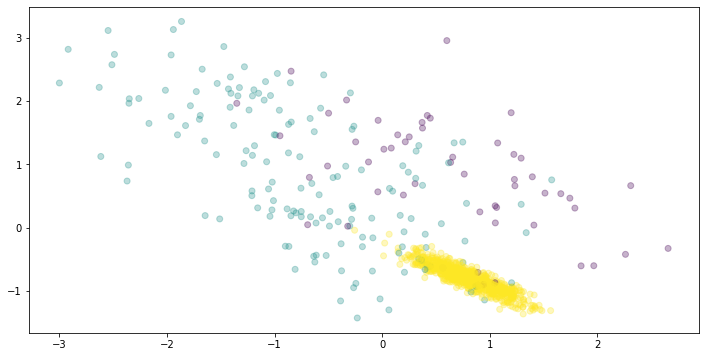

In [20]:
fig = plt.figure(figsize=(12,6))
plt.scatter(data[:,0],data[:,1], c=label, alpha=0.3)

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [22]:
smote_data, smote_label = smote.fit_resample(data, label)
print('원본 데이터의 클래스 비율: \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과: \n{}'.format(pd.get_dummies(smote_label).sum()))

원본 데이터의 클래스 비율: 
0     53
1    154
2    793
dtype: int64

SMOTE 결과: 
0    793
1    793
2    793
dtype: int64


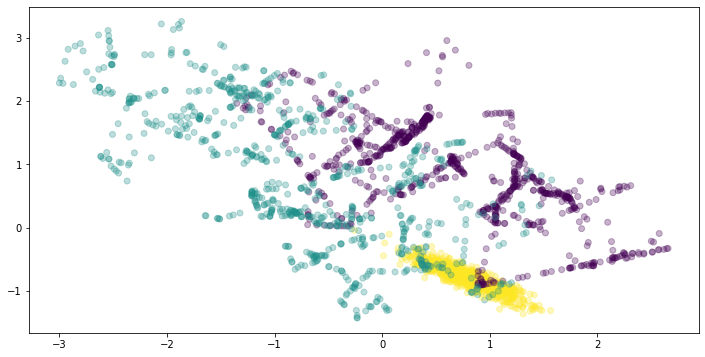

In [23]:
fig = plt.figure(figsize=(12,6))
plt.scatter(smote_data[:,0],smote_data[:,1], c=smote_label, alpha=0.3)
# 위의 그래프와 비교했을때 데이터의 트렌드를 흐트려놓지않고 수만 증가함을 알 수 있다.

In [24]:
# 차원의 축소
from sklearn.datasets import load_digits
digits = load_digits()

In [26]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [27]:
data = digits.data
label = digits.target

In [28]:
data.shape

(1797, 64)

In [30]:
label.shape #정답만 들어갔기 때문에

(1797,)

In [36]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [37]:
data[0].reshape(8,8) # 64개를 2차원 8X8에 모양을 표시하므로 재조정

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [38]:
label[0]

0

Label: 0


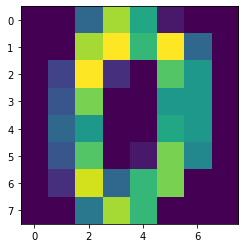

In [46]:
plt.imshow(data[0].reshape(8,8))
print('Label: {}'.format(label[0]))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 전체 요소의 값은 2개다

In [48]:
new_data = pca.fit_transform(data)

In [49]:
print('원본 데이터의 차원 \n{}'.format(data.shape))
print('PCA를 거친 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)
PCA를 거친 데이터의 차원 
(1797, 2)


In [50]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [52]:
new_data[0] #위의 64차원을 2차원으로 축소.

array([-1.25946105, 21.2748937 ])

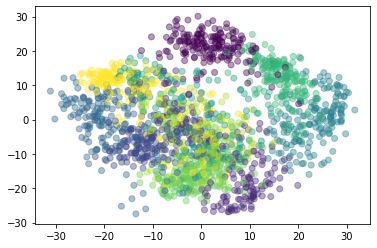

In [58]:
plt.scatter(new_data[:,0],new_data[:,1],c=label,alpha=0.4)
plt.legend() # 9개 정도로 분류

In [59]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)

In [60]:
label = data['Sex']

In [61]:
# 라벨 엔코딩은 코딩으로도 쉽지만 더 쉽게 만들어진 함수 쓰자
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [65]:
label_encoded_label = le.fit_transform(label)

In [67]:
label_encoded_label

array([2, 2, 0, ..., 2, 0, 2])

In [68]:
label

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [75]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) #True

one_hot_encoded = ohe.fit_transform(label.values.reshape(-1,1))

In [76]:
one_hot_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])